# Avocado price forecasting

The dataset, which contains retail scan data for avocado sellings, was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The data can easily be retrieved over the [kaggle challenge page](https://www.kaggle.com/neuromusic/avocado-prices). Let's start by loading our dataset, so we can start exploring the data inside!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('./data/avocado.csv')

Let's check the size of our dataset first:

In [2]:
print('Training set shape: ', df.shape)

Training set shape:  (18249, 14)


Let's by taking a peek at our dataset trough the head function to see what kind of variables are present.

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Let's drop the useless index column:

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

It's  quick to check that we have no missing entries in our dataset. Kaggle likes to make things easier for us, but real dataset aren't that kind.

In [5]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In our data, we have two categorical features, namely type and region. We can quickly check how many entries each category has and which are the category:

In [6]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

We notice that almost 50% of our avocados are conventional and the remaining are organic, which makes for a pretty balanced feature. Let's check the regions:

In [7]:
df['region'].value_counts()

Sacramento             338
Indianapolis           338
Midsouth               338
Albany                 338
SanFrancisco           338
GreatLakes             338
NewOrleansMobile       338
Jacksonville           338
West                   338
LosAngeles             338
NewYork                338
CincinnatiDayton       338
Houston                338
Boise                  338
MiamiFtLauderdale      338
DallasFtWorth          338
Pittsburgh             338
BuffaloRochester       338
Northeast              338
SouthCarolina          338
LasVegas               338
Spokane                338
California             338
HartfordSpringfield    338
Orlando                338
Denver                 338
RaleighGreensboro      338
Philadelphia           338
Seattle                338
Atlanta                338
Roanoke                338
Plains                 338
SouthCentral           338
HarrisburgScranton     338
NorthernNewEngland     338
BaltimoreWashington    338
Chicago                338
T

In [8]:
print('The total number of region is ' + str(df['region'].value_counts().count()))

The total number of region is 54


We have a grandtotal of 54 different american cities, each with almost 338 entries. 

For the numerical features, we can quickly take a look at the statistical informations trough the describe function.

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Let's create a temporary dataset we'll use to experiment. 

In [10]:
avocado_df = df.copy()

We can split the date so we can perform further analysis later; We can do this easily using pandas:

In [11]:
# Transoform the column into datetime format
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

# Split the date
avocado_df['Day']=avocado_df['Date'].dt.day
avocado_df['Month']=avocado_df['Date'].dt.month
avocado_df['Year']=avocado_df['Date'].dt.year

In [12]:
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015


## data visualization

It's time to start visually analize our data and start gaining insights. It's important to keep in mind that we are dealing with time-series data. 

Let's start by checking the average price of avocados during time: 

C:\Users\zanet\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


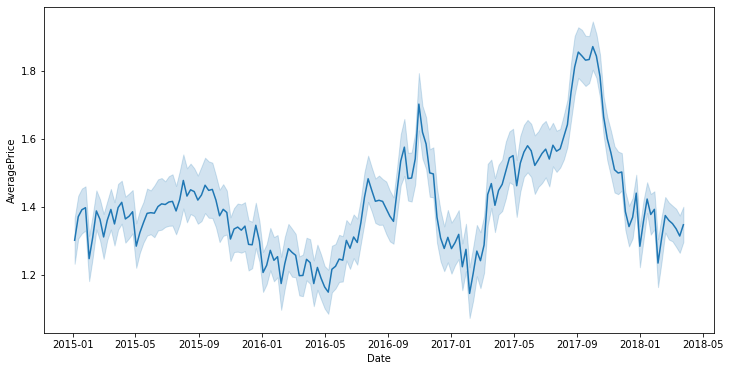

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Date", y="AveragePrice", data=avocado_df)

Here we can quickly see that our data span between the early 2015 to May 2018.
 
In particular, we can see some seasonality on the fluctuation of the price: during the coldest months, the price seems to go down by a small margin. Trough a quick research on Google, we discover that the avocado season usually start in spring and see its end towards the fall. Thus, we see a lower demands for Avocado (perhaps due to the off-seasonality of the product offered during the coldest month?). This will need further investigation going forward.

Another particularly interesting phenomenon is the great spike on the price during 2016 and the following year. We may be tempted to say that the Avocado became 'mainstream' jsut recently, but by checking Google Trends we don't see any particular spikes in the searches (which usually correlate to popularity). The cause of the increase was due to a shortage of supplies. The price however didn't decrease the following year, and just during early 2018 started to decrease back due to higher availability. Shippings from Mexico (the larger furnisher of Avocado for USA) may also affects the price. 

Let's compare the price differentiating by the type of avocado (organic or conventional).

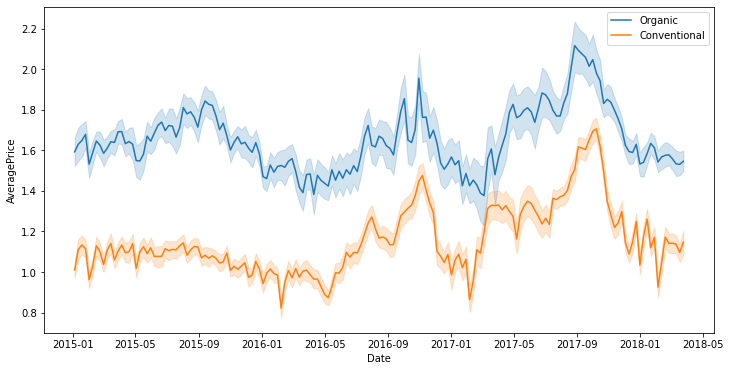

In [20]:
# Query the dataset
organic_df = avocado_df[avocado_df.type == 'organic']
conventional_df = avocado_df[avocado_df.type == 'conventional']

# plot the comparison
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Date", y="AveragePrice", data=organic_df)
ax = sns.lineplot(x="Date", y="AveragePrice", data=conventional_df)
plt.legend(labels=['Organic', 'Conventional'])

From the graphic above we can see that the price of organic Avocado is much higher than the price of the conventional counterpart. Let's see how this reflect on the quantity of products that is sold.

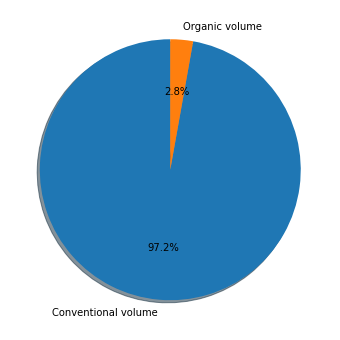

In [22]:
organic_quantity = organic_df['Total Volume'].sum()
conventional_quantity = conventional_df['Total Volume'].sum()
plt.figure(figsize=(12, 6))
plt.pie([conventional_quantity, organic_quantity],  labels=['Conventional volume', 'Organic volume'], autopct='%1.1f%%',  shadow=True, startangle=90)
plt.show()

Seems like that the reduced price reflect itself heavily on the quantity of avocado sold. Since the conventional avocado is much cheaper, people will tend to buy that instead of the expensive alternative (the organic avocado). Let's see how this reflect on the total sale if we consider also the price. 

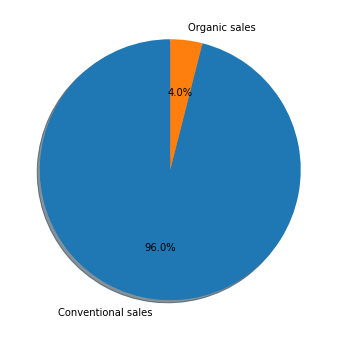

In [24]:
organic_total = organic_quantity*organic_df['AveragePrice'].mean()
conventional_total = conventional_quantity*conventional_df['AveragePrice'].mean()

plt.figure(figsize=(12, 6))
plt.pie([conventional_total, organic_total],  labels=['Conventional sales', 'Organic sales'], autopct='%1.1f%%',  shadow=True, startangle=90)
plt.show()

If we adjust for the mean average price, organic avocado becomes a bit more important (1.2% more of the grandtotal), but the market is still mostly dominated by the conventional sales. 

### Stationarity test

**Further test needed. keep the conceptual**



We can make hypothesis on the stationarity of the prices over time. In stationary (time) series, statistical properties like mean, variance and autocorrelation mantains constant over time. Since most statistical models for time series assume the stationarity of the data, this is an important matter. If our data is not stationary, we should convert it to stationary. 

There are many different ways to assume stationarity on our data, for example we could:
1. By graphically looking at our data;
2. Dickey-Fuller Test;
3. Statistical property over different parts of our data.

The idea behind a Dickey-Fuller test is to test the null hypothesis that a unit root is present in time series data, which refers to a stochastic trend. To perform a Dickey-Fuller test, we can use the [adfuller function](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) from the statsmodel library, which perform an Augmented Dickey-Fuller on our data. Let's do this for the price of the avocado.

In [16]:
## Perform an ADF test on our time series data
from statsmodels.tsa.stattools import adfuller

X = avocado_df['AveragePrice']
results = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Tresholds:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

TypeError: descriptor '__sub__' requires a 'datetime.datetime' object but received a 'float'

We've obtained a p-value of <0.001, which implies high significance. Therefore, we can reject the null hypothesis. Therefore, our data will (likely) be stationary. 

In [67]:
import numpy as np
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.120888, mean2=0.478237
variance1=0.052552, variance2=0.051426
